# Wstęp do Uczenia Maszynowego - Projekt 1
### Krzysztof Osiński, Jakub Miszczak

## Packages

In [4]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
np.random.seed(23)
import zipfile

# Fraud Detection Transactions Dataset - EDA

In [5]:
zip_path = "fraud-detection-transactions-dataset.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open("synthetic_fraud_dataset.csv") as file:
        df = pd.read_csv(file)

df.shape

(50000, 21)

### Columns description

Transaction_ID  -  Unique identifier for each transaction

User_ID	 -  Unique identifier for the user

Transaction_Amount  -  Amount of money involved in the transaction

Transaction_Type  -  Type of transaction (Online, In-Store, ATM, etc.)

Timestamp  -  Date and time of the transaction

Account_Balance	 -  User's current account balance before the transaction

Device_Type	Type of device used (Mobile, Desktop, etc.)

Location	Geographical location of the transaction

Merchant_Category	Type of merchant (Retail, Food, Travel, etc.)

IP_Address_Flag	Whether the IP address was flagged as suspicious (0 or 1)

Previous_Fraudulent_Activity	Number of past fraudulent activities by the user

Daily_Transaction_Count	Number of transactions made by the user that day

Avg_Transaction_Amount_7d	User's average transaction amount in the past 7 days

Failed_Transaction_Count_7d	Count of failed transactions in the past 7 days

Card_Type	Type of payment card used (Credit, Debit, Prepaid, etc.)

Card_Age	Age of the card in months

Transaction_Distance	Distance between the user's usual location and transaction location

Authentication_Method	How the user authenticated (PIN, Biometric, etc.)

Risk_Score	Fraud risk score computed for the transaction

Is_Weekend	Whether the transaction occurred on a weekend (0 or 1)

Fraud_Label	Target variable (0 = Not Fraud, 1 = Fraud)
riable (0 = Not Fraud, 1 = Fraud)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [7]:
# Let's check if there are any NULL values
df.isnull().sum()

Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64

In [8]:
df.columns = df.columns.str.replace(" ","_").str.lower()

In [10]:
# We drop columns that don't give us any valuable information
df1 = df.drop(['transaction_id','user_id'],axis='columns')
df1['timestamp'] = pd.to_datetime(df1['timestamp'])
df1.head(5)

,transaction_amount,transaction_type,timestamp,account_balance,device_type,location,merchant_category,ip_address_flag,previous_fraudulent_activity,daily_transaction_count,avg_transaction_amount_7d,failed_transaction_count_7d,card_type,card_age,transaction_distance,authentication_method,risk_score,is_weekend,fraud_label
0,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [11]:
numeric_df = df1.select_dtypes(include=['number'])
categorical_df = df1.select_dtypes(exclude=['number'])

In [13]:
categorical_df.columns

Index(['transaction_type', 'timestamp', 'device_type', 'location',
       'merchant_category', 'card_type', 'authentication_method'],
      dtype='object')

In [14]:
numeric_df.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_amount,50000.0,99.411012,98.687292,0.0000,28.6775,69.66000,138.852500,1174.14
account_balance,50000.0,50294.065981,28760.458557,500.4800,25355.9950,50384.43000,75115.135000,99998.31
ip_address_flag,50000.0,0.050200,0.218360,0.0000,0.0000,0.00000,0.000000,1.00
previous_fraudulent_activity,50000.0,0.098400,0.297858,0.0000,0.0000,0.00000,0.000000,1.00
daily_transaction_count,50000.0,7.485240,4.039637,1.0000,4.0000,7.00000,11.000000,14.00
avg_transaction_amount_7d,50000.0,255.271924,141.382279,10.0000,132.0875,256.08500,378.032500,500.00
failed_transaction_count_7d,50000.0,2.003540,1.414273,0.0000,1.0000,2.00000,3.000000,4.00
card_age,50000.0,119.999940,68.985817,1.0000,60.0000,120.00000,180.000000,239.00
transaction_distance,50000.0,2499.164155,1442.013834,0.2500,1256.4975,2490.78500,3746.395000,4999.93
risk_score,50000.0,0.501556,0.287774,0.0001,0.2540,0.50225,0.749525,1.00


### Zobaczmy rozkłady poszczególnych zmiennych
Pomimo, że wszystkie zmienne są typu *float*, to nadal możemy mieć zmienne dyskretne/kategoryczne  
Można to sprwadzić przy użyciu metody *value_counts()* oraz **opisu danych**  
W tym przypadku, poza CHAS nie ma takiej sytuacji

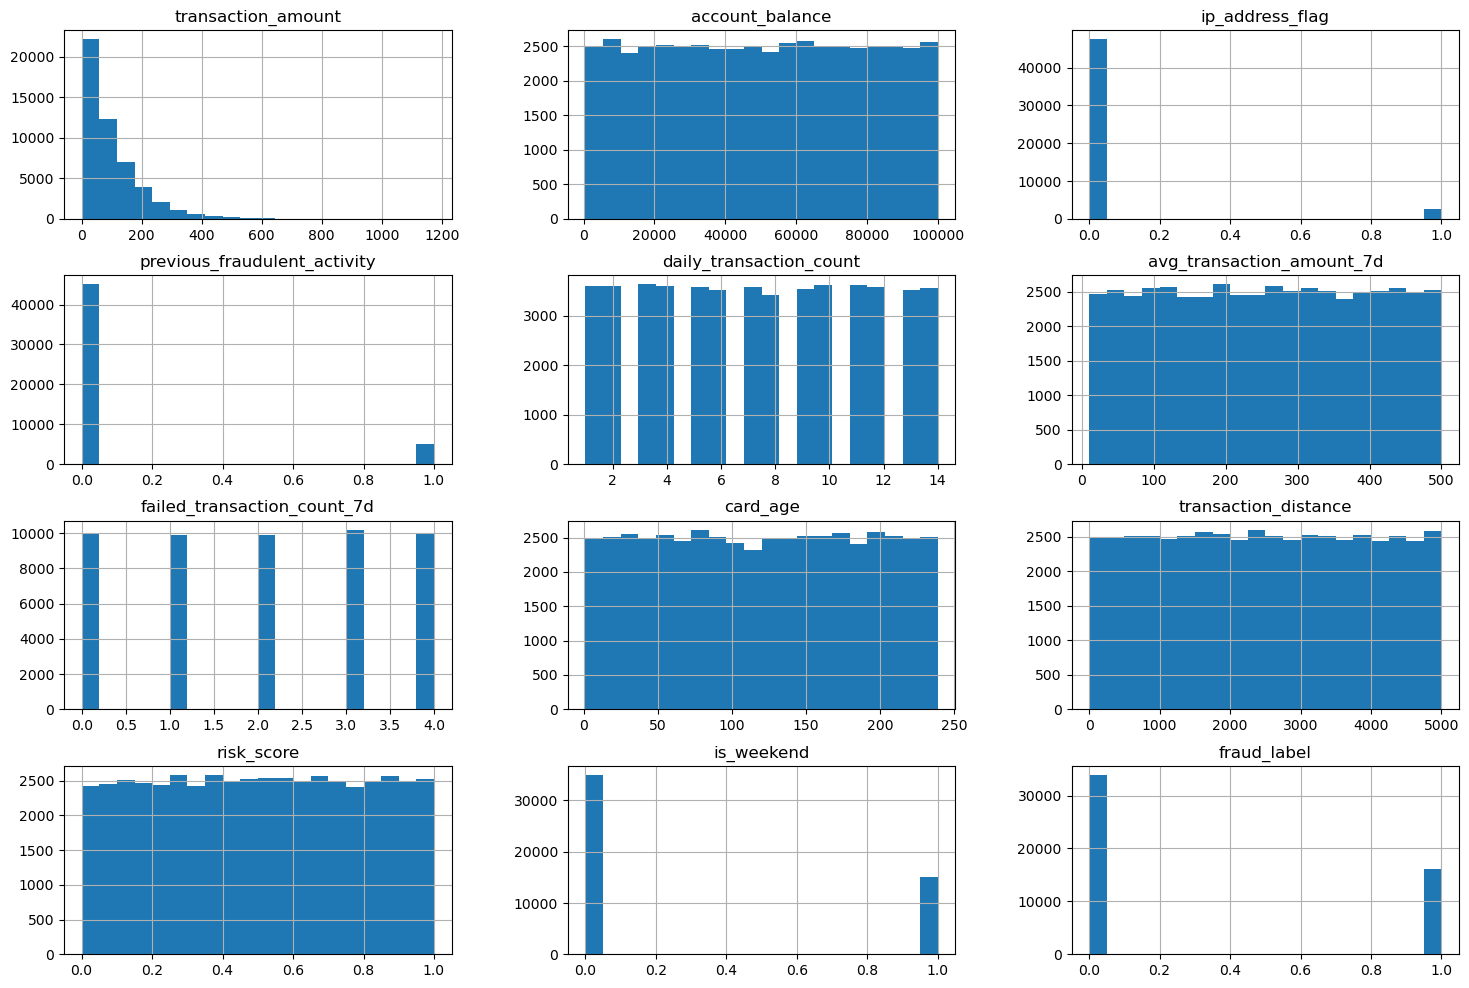

In [24]:
numeric_df.hist(figsize=(18, 12), bins=20)
plt.show()

In [21]:
numeric_df['daily_transaction_count'].value_counts().sort_index()

daily_transaction_count
1     3598
2     3605
3     3634
4     3606
5     3582
6     3521
7     3574
8     3418
9     3538
10    3623
11    3620
12    3586
13    3524
14    3571
Name: count, dtype: int64

In [22]:
numeric_df['failed_transaction_count_7d'].value_counts().sort_index()

failed_transaction_count_7d
0    10014
1     9919
2     9897
3    10216
4     9954
Name: count, dtype: int64

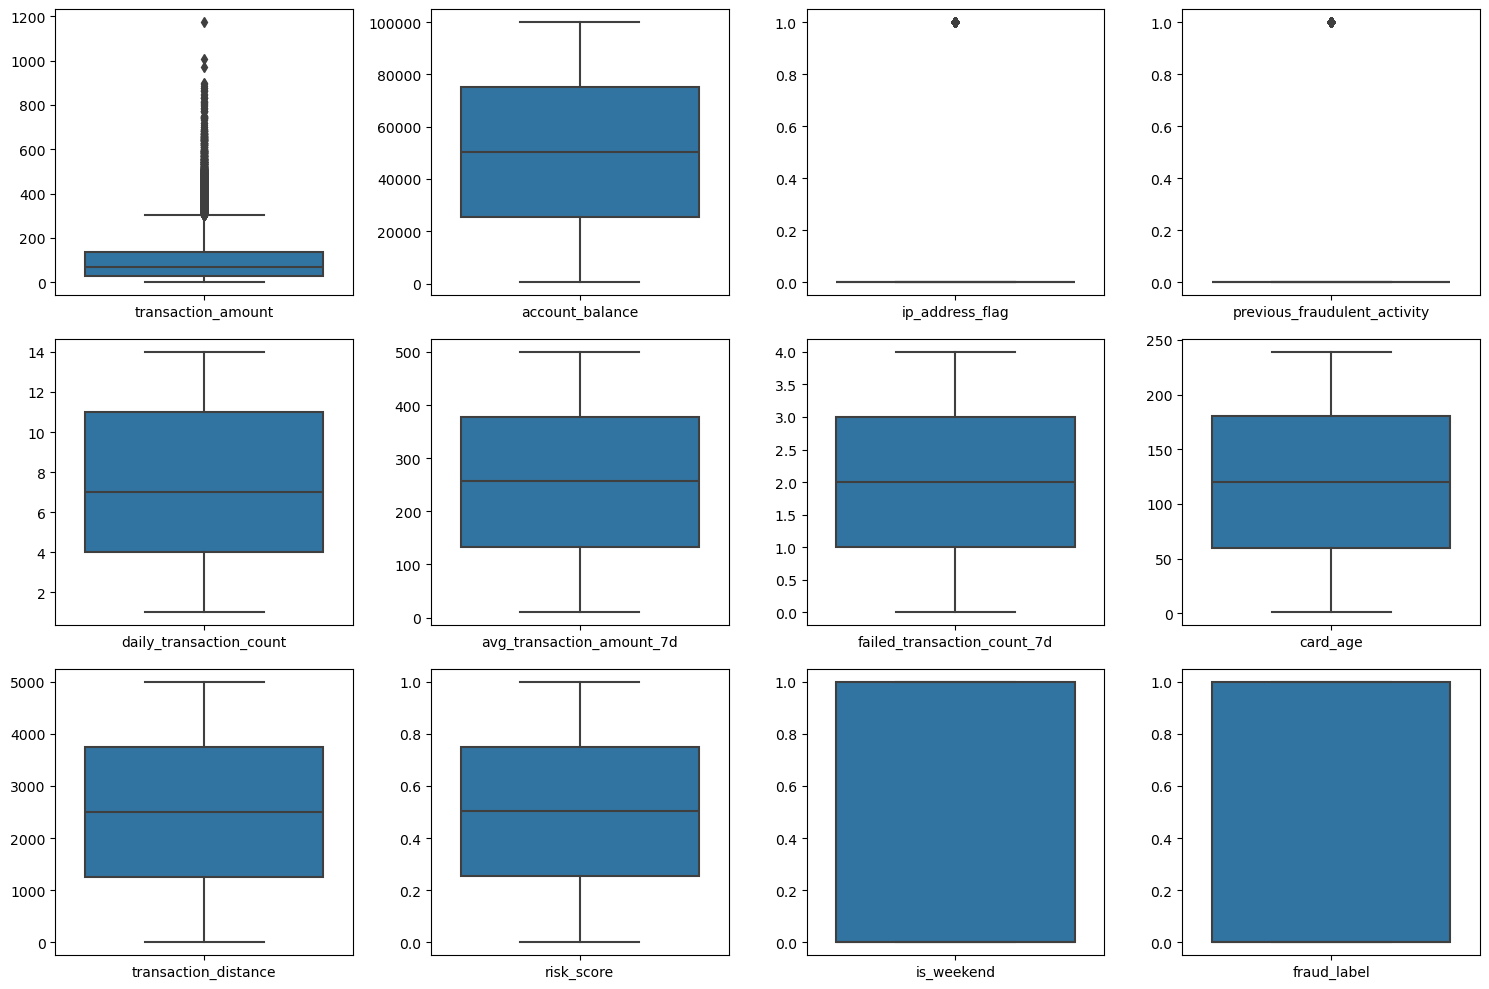

In [26]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numeric_df, 1):
    plt.subplot(3, 4, i)  # 3 rows, 4 columns, plot i-th boxplot
    sns.boxplot(data=df1[feature])
    plt.xticks([0], [feature])

plt.tight_layout()
plt.show()

### Outliery
transaction_amount zawiera outliery

## Correlation Heatmap

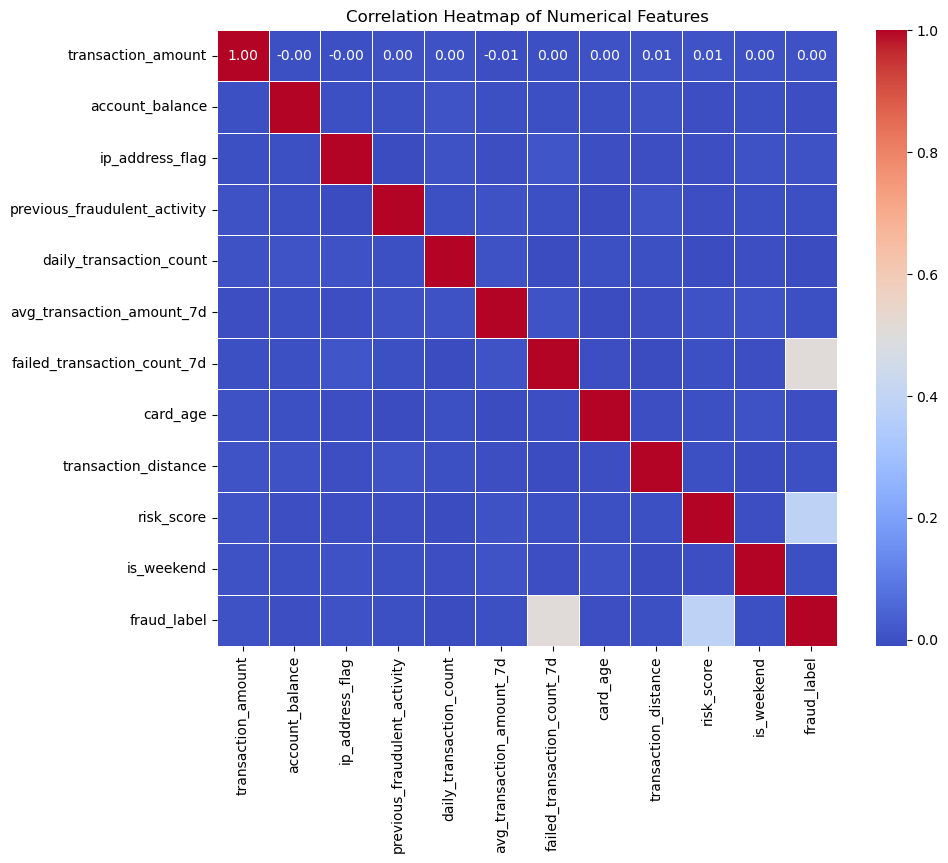

In [30]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.6)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

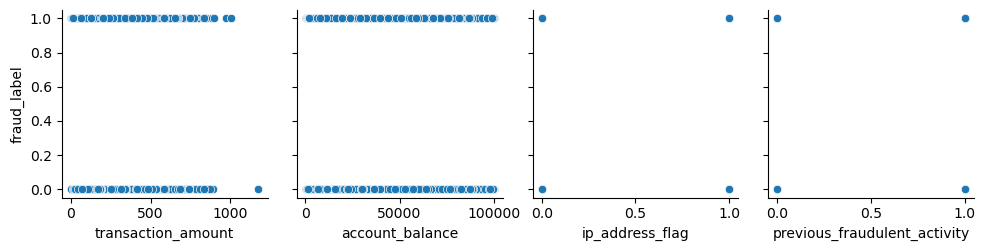

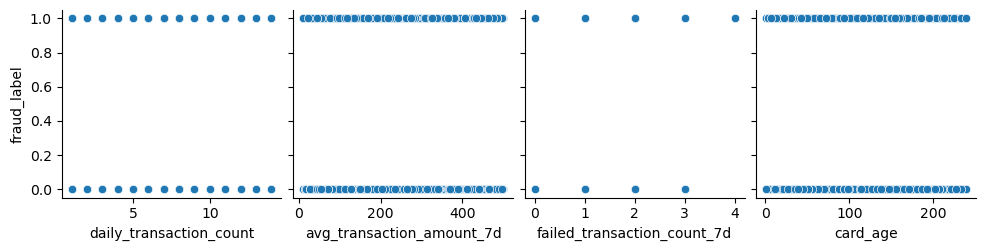

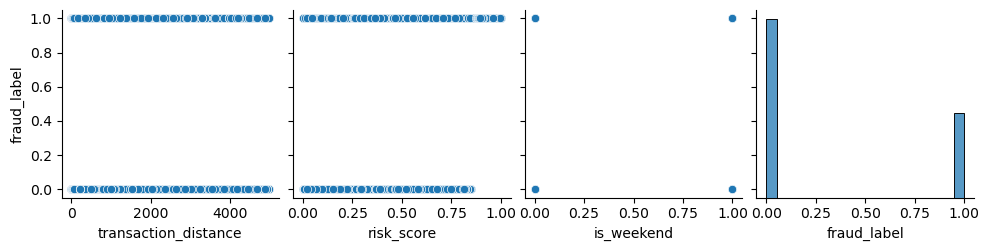

In [ ]:
categorical_df1 = categorical_df.drop('timestamp',axis=1)
for col in categorical_df1:
    print(col, ":", df2[col].unique())

# Przegląd wizualizacji

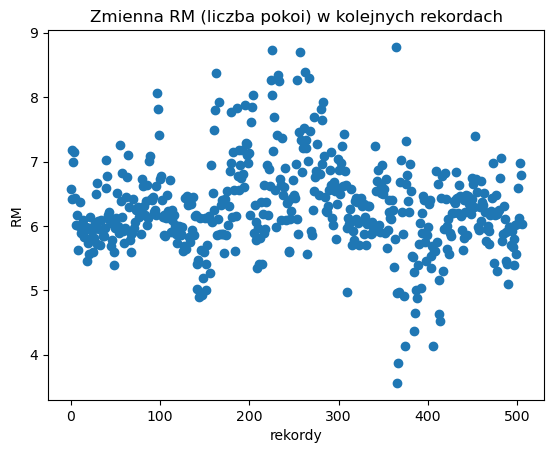

In [13]:
plt.plot(boston_df['RM'], 'o')
plt.title('Zmienna RM (liczba pokoi) w kolejnych rekordach')
plt.xlabel('rekordy')
plt.ylabel('RM')
plt.show()

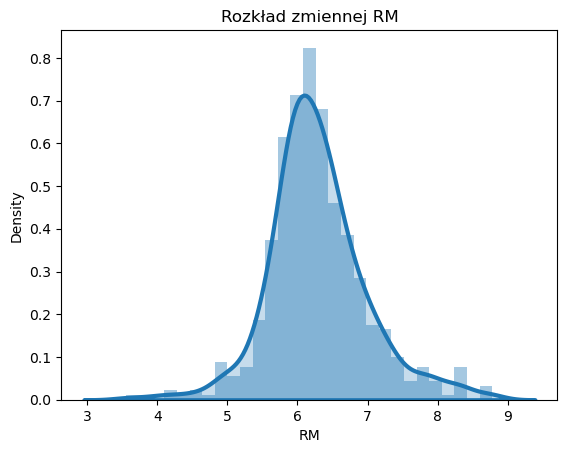

In [14]:
plot_dens=sns.distplot(boston_df['RM'], hist = True, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plot_dens.set_title('Rozkład zmiennej RM')
plt.show()

mediana = 6.2085
średnia = 6.284634387351779
Q1 = 5.8854999999999995 Q3 = 6.6235


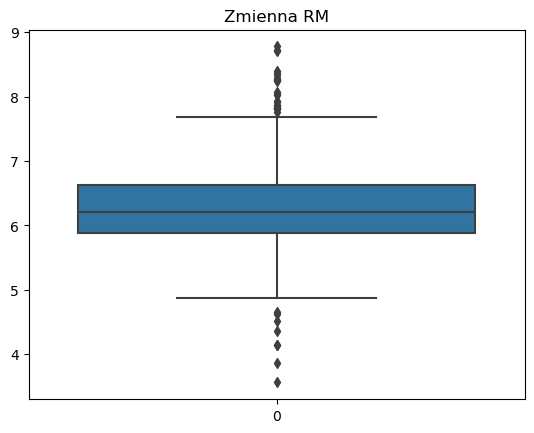

In [15]:
box_plot = sns.boxplot(boston_df['RM'])
box_plot.set_title('Zmienna RM')

print('mediana = %s' % np.median(boston_df['RM']))
print('średnia = %s' % np.mean(boston_df['RM']))
print('Q1 = %s' %np.percentile(boston_df['RM'], 25),'Q3 = %s' %np.percentile(boston_df['RM'], 75))

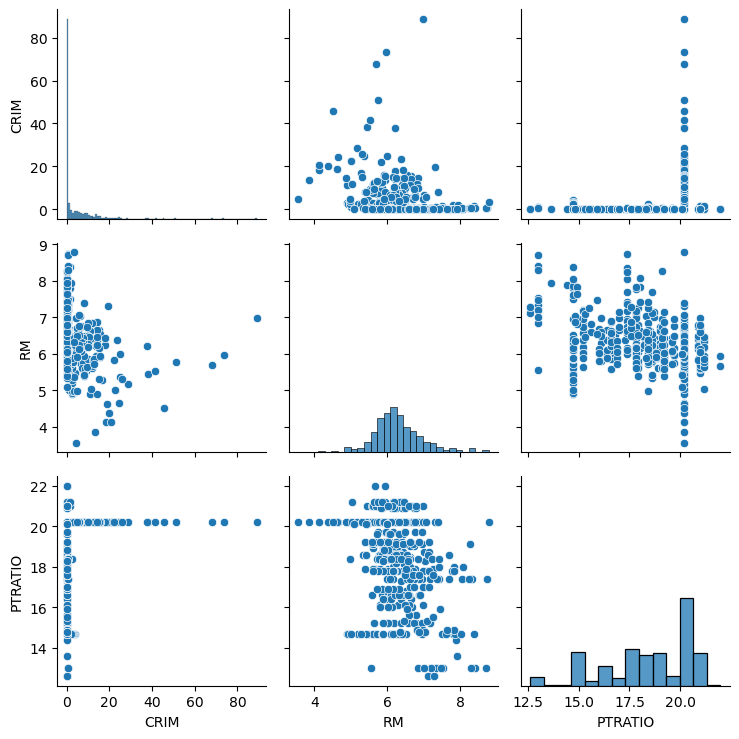

In [16]:
sns.pairplot(boston_df.iloc[:,[0,5,10]])
plt.tight_layout()

# tak naprawdę wystarczyłoby narysowanie tylko części wykresów
# czy jest koleracja zmiennych?

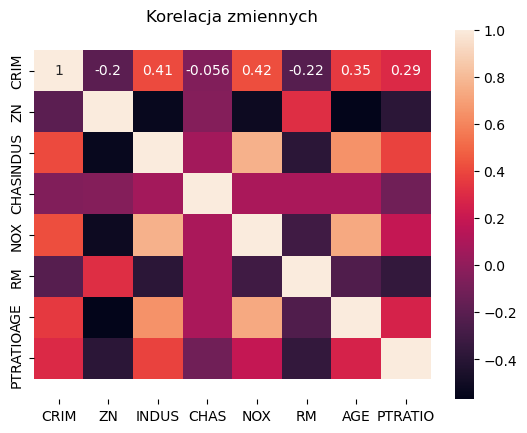

In [17]:
corr=boston_df.iloc[:,np.r_[0:7,10]].corr()
ax=sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns, annot=True)

# below is a workaround for matrix truncation
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Korelacja zmiennych')
plt.show()

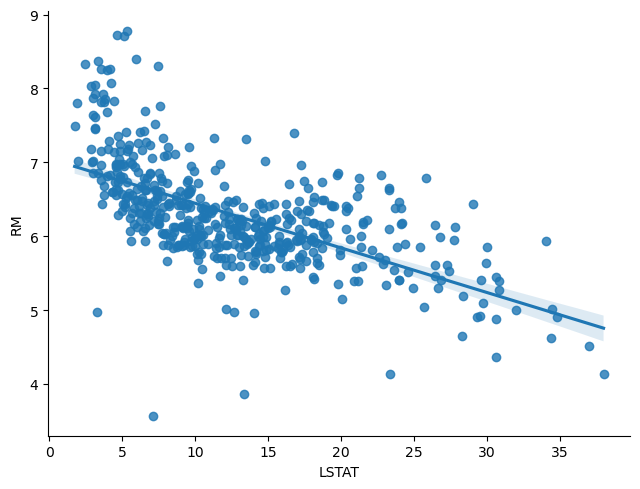

In [18]:
sns.lmplot( x='LSTAT', y='RM', data=boston_df, aspect=1.3)
plt.show()
#fit_reg=False, # No regression line
#dodaje automatycznie prostą regresji